### Old GLA notebook - where i was testing code on the first few rows 021017

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
sns.set()
sns.set_context("paper", rc={"lines.linewidth": 0.7})

In [2]:
# Import dataset in chunks using Pandas TextFileReader object
csv_name = 'C:/Users/User/Documents/my_code_files/R_codes/gla_interview_task_011017/smart_meter_data/Power-Networks-LCL-June2015(withAcornGps)v2.csv'

text_reader = pd.read_csv(csv_name, usecols=['LCLid', 'stdorToU', 'KWH/hh (per half hour) ','DateTime'], 
                          chunksize=50000, iterator = True) # iterator=TRUE means you can select a specific number of rows to view/operate on.

In [3]:
text_reader.get_chunk(5) # view first 5 rows

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0


In [6]:
first_household = text_reader.get_chunk(50000)
first_household.head() # first household LCLid = MAC000020

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
50005,MAC000003,Std,2013-08-11 17:00:00.0000000,0.134
50006,MAC000003,Std,2013-08-11 17:30:00.0000000,0.31
50007,MAC000003,Std,2013-08-11 18:00:00.0000000,0.21
50008,MAC000003,Std,2013-08-11 18:30:00.0000000,0.179
50009,MAC000003,Std,2013-08-11 19:00:00.0000000,0.168


In [7]:
first_household.describe()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
count,50000,50000,50000,50000
unique,3,1,36458,1356
top,MAC000004,Std,2013-10-27 00:00:00.0000000,0
freq,31677,50000,4,24307


In [8]:
# How many rows are there for the first household... - this code is dodgy!

first_household['LCLid'].value_counts() # MAC000002 has 24158

MAC000004    31677
MAC000003     9622
MAC000006     8701
Name: LCLid, dtype: int64

In [9]:
# save first household in df
first_household = pd.read_csv(csv_name, usecols=['LCLid', 'stdorToU', 'KWH/hh (per half hour) ','DateTime'], nrows=24158)

first_household.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0


In [10]:
# cleaning

# rename kwh and convert to float / numeric data type
first_household = first_household.rename(columns = {'KWH/hh (per half hour) ' : 'kwh'})
first_household['kwh'] = pd.to_numeric(first_household['kwh'], errors='coerce')

# get date from datetime
first_household['DateTime'] =  pd.to_datetime(first_household['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')
first_household['day'] = pd.to_datetime(first_household['DateTime'].apply(lambda x: x.date()))

first_household.head()

,LCLid,stdorToU,DateTime,kwh,day
0,MAC000002,Std,2012-10-12 00:30:00,0.0,2012-10-12
1,MAC000002,Std,2012-10-12 01:00:00,0.0,2012-10-12
2,MAC000002,Std,2012-10-12 01:30:00,0.0,2012-10-12
3,MAC000002,Std,2012-10-12 02:00:00,0.0,2012-10-12
4,MAC000002,Std,2012-10-12 02:30:00,0.0,2012-10-12


In [11]:
# compute daily consumption
first_household_summary = first_household.groupby(['LCLid', 'day']).agg({'kwh': sum}).reset_index()

first_household_summary.head()

,LCLid,day,kwh
0,MAC000002,2012-10-12,7.098
1,MAC000002,2012-10-13,11.087
2,MAC000002,2012-10-14,13.223
3,MAC000002,2012-10-15,10.257
4,MAC000002,2012-10-16,9.769


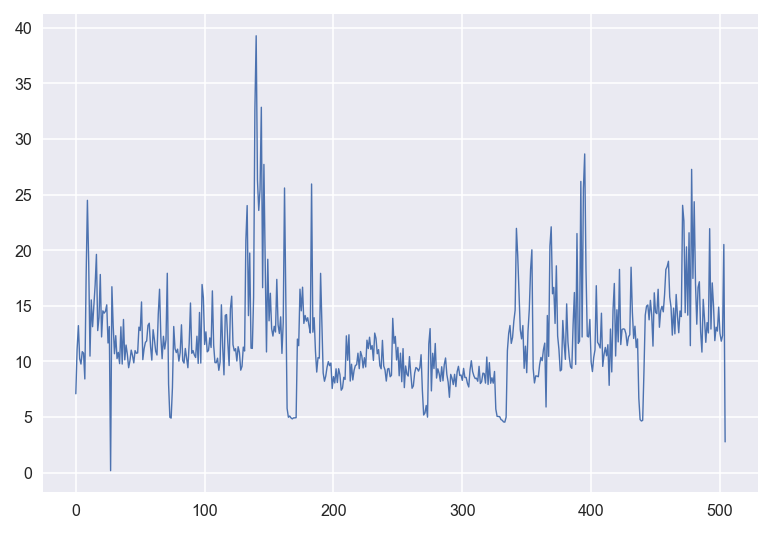

In [12]:
# exploratory plot
plt.plot(first_household_summary['kwh'])